In [15]:
import numpy
import pandas
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [16]:
dtype = {
    'store_nbr': 'category',
    'family': 'category',
    'sales': 'float32',
    'onpromotion': 'uint64',
}

train = pandas.read_csv("./data/train.csv", parse_dates=["date"], dtype=dtype)
train = train.set_index("date").to_period("D")
train = train.set_index(["store_nbr", "family"], append=True)
avg_sales = train.groupby("date").mean()["sales"]

avg_sales.head()

date
2013-01-01      1.409438
2013-01-02    278.390808
2013-01-03    202.840195
2013-01-04    198.911163
2013-01-05    267.873260
Freq: D, Name: sales, dtype: float32

In [ ]:
# Implement basic time series regression
avg_sales["time"] = numpy.arange(len(avg_sales.index))

X = avg_sales.loc[:, ["time"]]
y = avg_sales.loc[:, "sales"]

model = LinearRegression()
model.fit(X, y)

y_pred = pandas.Series(model.predict(X), index=X.index)

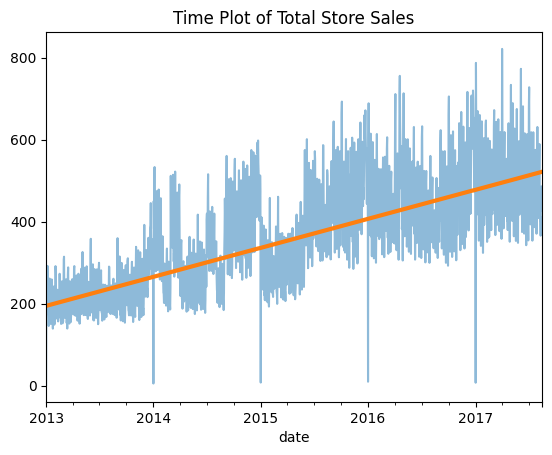

In [25]:
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Total Store Sales');

In [26]:
# Implement a time series regression with lagged values
lag_1 = avg_sales["sales"].shift(1)

avg_sales['lag_1'] = lag_1

X = avg_sales.loc[:, ['lag_1']].dropna()
y = avg_sales.loc[:, 'sales']
y, X = y.align(X, join='inner')

model = LinearRegression()
model.fit(X, y)

y_pred = pandas.Series(model.predict(X), index=X.index)

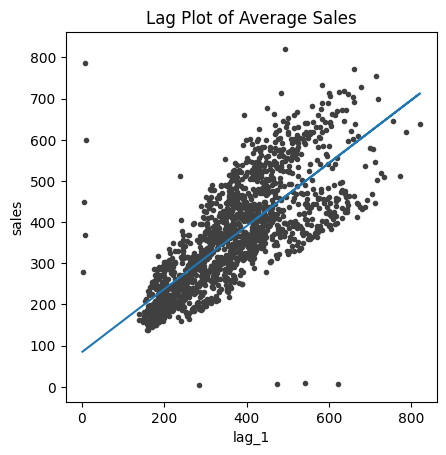

In [27]:
fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
ax.plot(X['lag_1'], y_pred)
ax.set(aspect='equal', ylabel='sales', xlabel='lag_1', title='Lag Plot of Average Sales');